In [4]:
import os
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

# Get list of all CSV files in the directory
list_of_files = list(Path("../../logs/fainder_results_size").rglob("*.csv"))

# Find the latest file
latest_file = max(list_of_files, key=os.path.getctime)

# Load the latest CSV file into a DataFrame
df_latest = pd.read_csv(latest_file)
# timestamp,fainder_mode,threshold,percentile,result_size

print(f"Latest file: {latest_file}")
# Print the first few rows of the DataFrame
print(df_latest.head())
if "figures" not in os.listdir():
    os.mkdir("figures")

Latest file: ../../logs/fainder_results_size/fainder_results_size_20250515_103651.csv
             timestamp fainder_mode  threshold  percentile  result_size
0  2025-05-15 10:37:43  full_recall          1         0.1      6156331
1  2025-05-15 10:38:10        exact          1         0.1      5334372
2  2025-05-15 10:38:13  full_recall          1         0.2      5820394
3  2025-05-15 10:38:39        exact          1         0.2      5079615
4  2025-05-15 10:38:42  full_recall          1         0.3      5613779


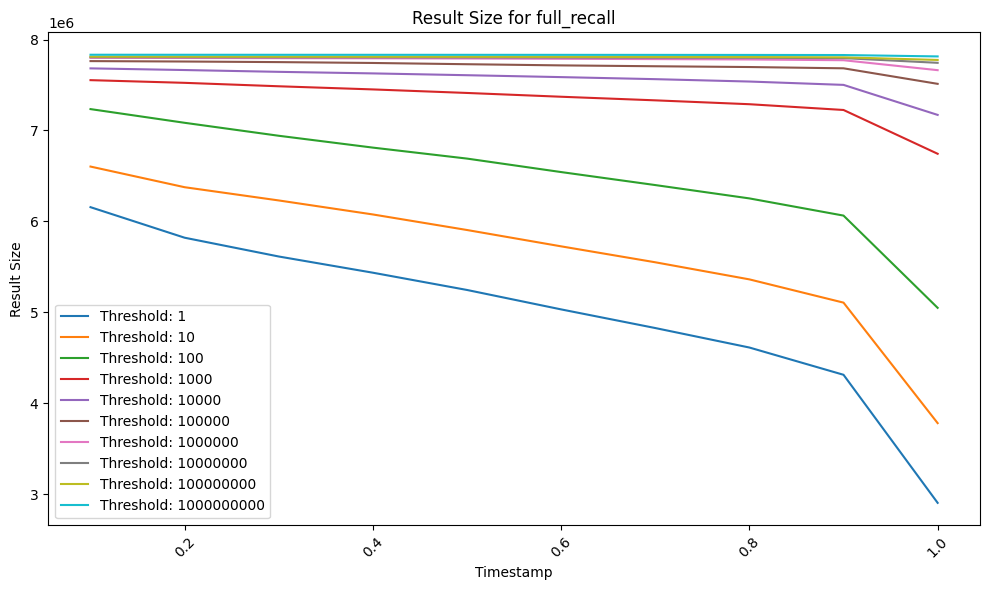

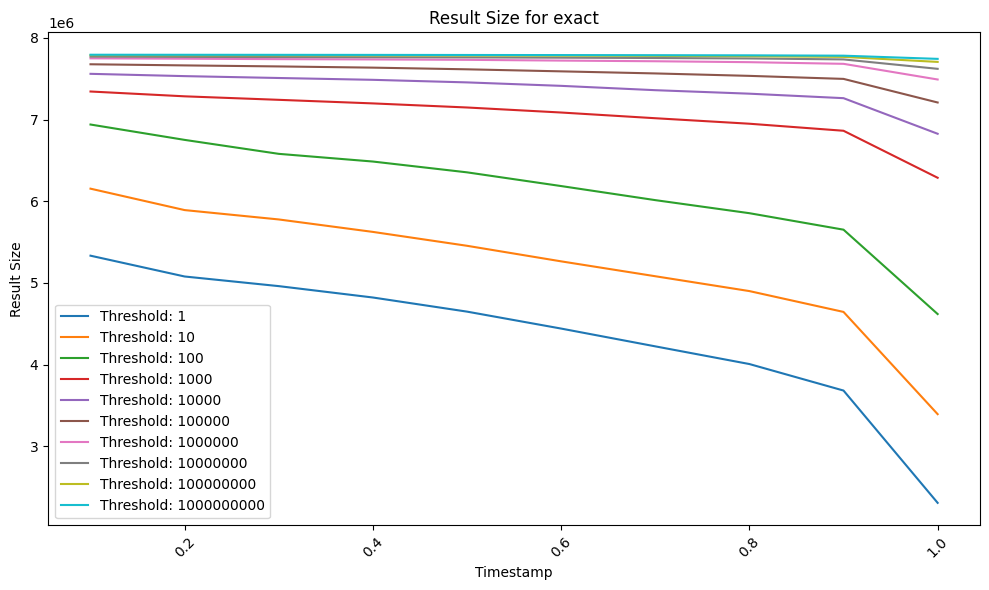

In [5]:
# plot the result size for each fainder mode (new plot)
# with lines for each threshold and percentile on the x-axis

for fainder_mode in df_latest["fainder_mode"].unique():
    df_fainder_mode = df_latest[df_latest["fainder_mode"] == fainder_mode]
    plt.figure(figsize=(10, 6))
    for threshold in df_fainder_mode["threshold"].unique():
        df_threshold = df_fainder_mode[df_fainder_mode["threshold"] == threshold]
        plt.plot(
            df_threshold["percentile"],
            df_threshold["result_size"],
            label=f"Threshold: {threshold}",
        )

    plt.title(f"Result Size for {fainder_mode}")
    plt.xlabel("Timestamp")
    plt.ylabel("Result Size")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"figures/result_size_{fainder_mode}.png")

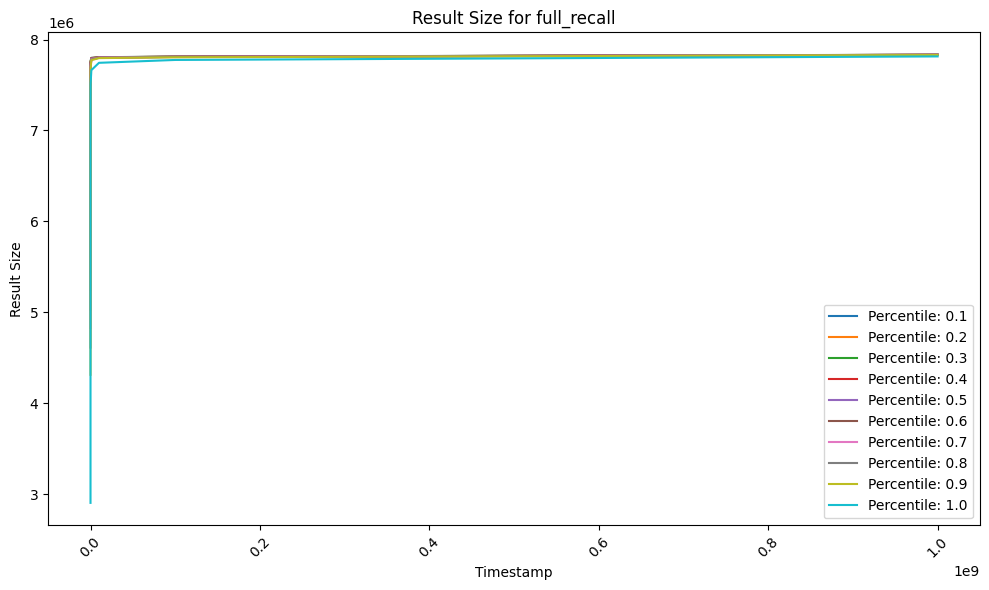

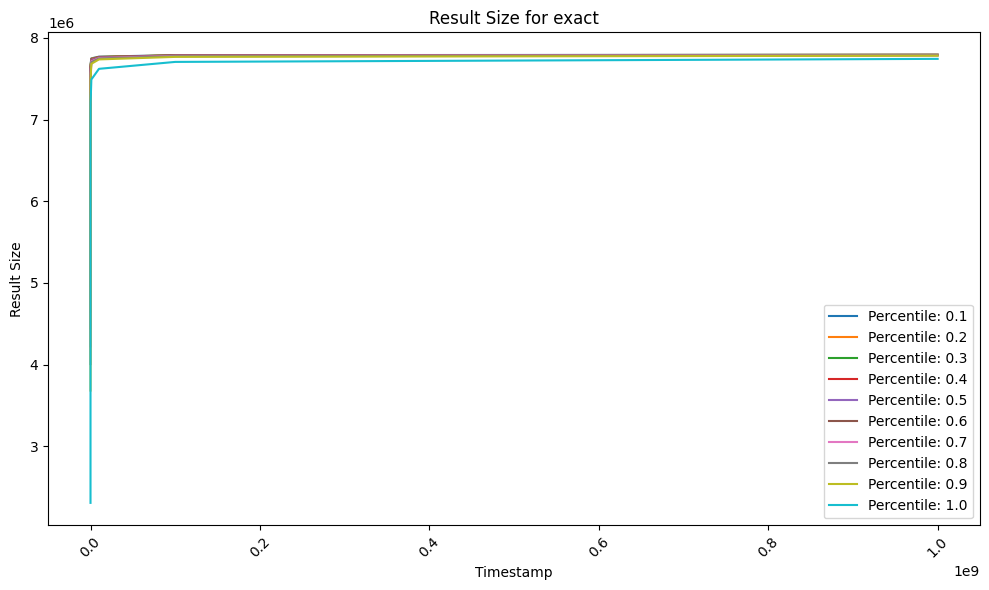

In [6]:
# plot the result size for each fainder mode (new plot)
# with lines for each percentile and threeshold on the x-axis

for fainder_mode in df_latest["fainder_mode"].unique():
    df_fainder_mode = df_latest[df_latest["fainder_mode"] == fainder_mode]
    plt.figure(figsize=(10, 6))
    for percentile in df_fainder_mode["percentile"].unique():
        df_percentile = df_fainder_mode[df_fainder_mode["percentile"] == percentile]
        plt.plot(
            df_percentile["threshold"],
            df_percentile["result_size"],
            label=f"Percentile: {percentile}",
        )

    plt.title(f"Result Size for {fainder_mode}")
    plt.xlabel("Timestamp")
    plt.ylabel("Result Size")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"figures/result_size_{fainder_mode}_percentile.png")